## 1.1 Introduction

The purpose of this project is to develop a predictive model which estimates household energy usage based on factors such as household occupancy, location, and structural features. This step focuses on collecting data, organizing it, and making sure it's well defined. 

Per the U.S. Energy Information Administration, 52% of household energy consumption is used for space heating and air conditioning. It should be noted, heating and air conditioning usage vary significantly based on location, home size and structure, and equpment and fuels used. 25% of household energy usage consists of water heating, lighting, and refrigeration (i.e. year round energy use). The remaining 23%  consists of devices such as televisions, cooking appliances, washer and dryers, and consumer electronics (i.e. computers, smart phones, video game consoles, streaming devices, etc.). 

Therefore, this project is focused on the household energy consumption of space heating and air conditioning and the estimated usage of large appliances. 

## 1.2 Objectives

The object of this notebook is to determine if the availiable data can be used to solve the problem statement and to identify issues with the dataset. 

## 1.3 Imports 

In [81]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1.4 Load Data 

The data collected by the U.S. Department of Energy is summarized in one dataframe:

In [84]:
all_data = pd.read_csv('C:\\Users\\Michelle\\Desktop\\2024_DataCamp\\CapstoneTwo\\raw_data\\recs2015_public_v4.csv')
all_data.info()
print(all_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 759 entries, DOEID to ZLPAMOUNT
dtypes: float64(262), int64(493), object(4)
memory usage: 32.9+ MB
(5686, 759)


This dataframe is extensive; the dataframe consists over 700 columns with over 5,000 rows of data. For the purposes of this project, key columns were extracted from the dataframe. These columns included data on the location of the home, home size, and energy usage. 

Note, the original dataset was organized in several supporting spreadsheets based on the category of information. For ease of use, the data was extracted from two of the supporting spreadsheets and merged using an outer join. It should be noted, there is a discrepancy in number of data points. The supporting files, organized by data category contain data on 4,382 households. The reason behind this discrepancy is unknown to the author.  

The columns were renamed to better describe the data using the published layout files with the associated dataset. 

In [86]:
#load supporting dataframes containing information on energy useage and house square footage. 
energy_usage_data = pd.read_csv('C:\\Users\\Michelle\\Desktop\\2024_DataCamp\\CapstoneTwo\\raw_data\\RECS05file11.csv')
energy_column_names = pd.read_csv('C:\\Users\\Michelle\\Desktop\\2024_DataCamp\\CapstoneTwo\\raw_data\\RECS05layoutFILE11.csv')
print("energy_usage_data:  ", energy_usage_data.shape)

housing_footage_data = pd.read_csv('C:\\Users\\Michelle\\Desktop\\2024_DataCamp\\CapstoneTwo\\raw_data\\RECS05file9.csv')
housing_footage_column_names = pd.read_csv('C:\\Users\\Michelle\\Desktop\\2024_DataCamp\\CapstoneTwo\\raw_data\\RECS05layoutFILE9.csv')
print("housing_footage_data:  ", housing_footage_data.shape)

energy_usage_data:   (4382, 38)
housing_footage_data:   (4382, 122)


In [87]:
#function used to rename variables based on layout table associated with the given dataset 
def col_rename(df, col_names):
    col = col_names[["VARIABLE", "VARIABLE LABEL"]].set_index('VARIABLE').to_dict()['VARIABLE LABEL']
    df.rename(columns=col, inplace = True)

In [88]:
col_rename(energy_usage_data,energy_column_names)

In [89]:
col_rename(housing_footage_data, housing_footage_column_names)

In [90]:
print(housing_footage_data.columns.tolist())

['Year Survey Conducted', '4-digit identification number', 'Census Region', 'Census Division', 'Four Largest States', 'Type of Home  (Respondent answer)', 'Mail Questionnaire Codes', 'The Final Weight', 'Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'Structure originally built as single-family house', 'More like a single-family house or an apartment', "Worry that you wouldn't be able to pay energy bill", 'Reduce basic household expenses', 'Need to borrow to pay energy bill', 'Skip or pay less than whole energy bill', 'Ever been threatened with energy cut off', 'Close off part of home to save energy', 'Keep temperature at an unsafe/unhealthy level', 'Leave home because it was too hot or too cold.', 'Use you kitchen stove or oven to provide heat', 'Receive energy assistance in the past 12 months', 'Ever receive energy assistance at this address', 'Heating system was broken and unable pay repair', 'Did energy aid help restore heatin

The data collected from these two datasets contains extraneous information. Therefore, the data regarding square footage was extracted from the database. 

In [92]:
#Remove extraneous data from housing_footage_data
sq_footage = [col for col in housing_footage_data.columns if 'square footage' in col]
sq_footage.append('4-digit identification number')
housing_footage_data = housing_footage_data[sq_footage]

In [93]:
print(housing_footage_data.columns.tolist())

['Respondent estimate of heated square footage', 'Total square footage', 'Total Basement square footage', 'Total Basement square footage', 'Total Attic square footage', 'Total Attic square footage', 'Total Garage square footage', 'Total heated square footage', 'Total unheated square footage', 'Basement heated square footage', 'Basement unheated square footage', 'Garage heated square footage', 'Garage unheated square footage', 'Attic heated square footage', 'Attic unheated square footage', 'Rest of HU heated square footage', 'Rest of HU unheated square footage', 'Total air-conditional square footage', 'Total unair-contiditioned square footage', 'Basement air-conditional square footage', 'Basement unair-contiditioned square footage', 'Garage air-conditional square footage', 'Garage unair-contiditioned square footage', 'Attic air-conditional square footage', 'Attic unair-contiditioned square footage', 'Rest of HU air-conditional square footage', 'Rest of HU unair-contiditioned square foot

In [94]:
#merge dataframes 
df = pd.merge(energy_usage_data, housing_footage_data, on='4-digit identification number', how='outer')
df.set_index('4-digit identification number', inplace = True)

In [95]:
#correct spelling 
df.rename(columns= {'Total air-conditional square footage': 'Total air-conditioned square footage',
                    'Total unair-contiditioned square footage': 'Total unair-conditioned square footage',
                    'Basement air-conditional square footage': 'Basement air-conditioned square footage',
                    'Basement unair-contiditioned square footage': 'Basement unair-conditioned square footage',
                    'Garage air-conditional square footage': 'Garage air-conditioned square footage',
                    'Garage unair-contiditioned square footage': 'Garage unair-conditioned square footage',
                    'Attic air-conditional square footage': 'Attic air-conditioned square footage', 
                    'Attic unair-contiditioned square footage': 'Attic unair-conditioned square footage',
                    'Rest of HU air-conditional square footage': 'Rest of HU air-conditioned square footage', 
                    'Rest of HU unair-contiditioned square footage': 'Rest of HU unair-conditioned square footage'}, inplace = True)

In [96]:
print(df.columns.tolist())

['Year Survey Conducted', 'Census Region', 'Census Division', 'Four Largest States', 'Type of Home  (Respondent answer)', 'Mail Questionnaire Codes', 'The Final Weight', 'Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'Kilowatt Hours Of Electricity Used', 'Electric Annual Use In Thousands Of BTU', 'CCFS (Hundred Cubic Feet) Of Natural Gas', 'Natural Gas Annual Use In Thousands Of BTU', 'Gallons Of Fuel Oil Bought', 'Fuel Oil Annual Use In Thousands Of BTU', 'Gallons Of LPG Bought', 'LPG Annual Use In Thousands Of BTU', 'Gallons Of Kerosene Bought', 'Annual Kerosene Use In Thousands Of BTU', 'Electric Dryer Use (Estimated)', 'Electric Dishwasher Use (Estimated)', 'Electric Freezer Use (Estimated)', 'Electric Refrigerator Use (Estimated)', 'Electric AC Use (Estimated)', 'Electric Water Heat Use (Estimated)', 'Electric Space Heat Use (Estimated)', 'Electric Appliance Use (Estimated)', 'Natural Gas Appliance Use (Estimated)', 'Natural

## 1.5 Remove Duplicate Data

The merged dataframe is checked for duplicate columns. Two duplicate column names were identified. Therefore, the column values were checked to ensure these columns contained the same data. 

In [99]:
duplicates = set(filter(lambda x: df.columns.tolist().count(x) > 1, df.columns.tolist()))
print(duplicates)

{'Total Basement square footage', 'Total Attic square footage'}


In [100]:
dupe_columns = {}
for dupes in duplicates:
    index_no = df.columns.get_loc(dupes)
    dupe_columns[dupes] = [i for i, x in enumerate(index_no) if x]
print(dupe_columns)

{'Total Basement square footage': [39, 40, 66, 67], 'Total Attic square footage': [41, 42, 64, 65]}


In [101]:
for key in dupe_columns:
    keys = df.iloc[:, dupe_columns[key]].round().astype(int)
    unq = keys.eq(keys.iloc[:, 0], axis=0).all(1)
    print(unq.unique())
    print(df[key][~unq])   

[ True]
Empty DataFrame
Columns: [Total Basement square footage, Total Basement square footage, Total Basement square footage, Total Basement square footage]
Index: []
[ True False]
                               Total Attic square footage  \
4-digit identification number                               
759                                                   615   
2479                                                  617   
2654                                                  623   
2757                                                 1185   
2848                                                  527   
3023                                                 1955   
3307                                                 1565   
3480                                                  911   
3670                                                  975   
4279                                                  897   

                               Total Attic square footage  \
4-digit identification n

Note, This check reveals, the columns are dulipates of the same data. However, the Total Attic square footage columns contains data with varying sigificant figures. Therefore, the repeating columns were removed from the dataframe. 

In [103]:
df = df.loc[:,~df.columns.duplicated()].copy()

In [104]:
print(df.shape)

(4382, 62)


In [105]:
duplicates = set(filter(lambda x: df.columns.tolist().count(x) > 1, df.columns.tolist()))
print(duplicates)

set()


## 1.6 Identify Missing Values

The purpose of this project is to determine energy use of a household. This includes electricity, natural gas, fuel, liquid petroleum gas (LPG), kerosene, and wood consumption based on household size. 

The other columns of this dataframe are potential feature influencing the total energy usage. It is important to note, additional features of this dataset include the estimated energy usage of large appliances (i.e. dryer, dishwasher, freezer, refrigerator, etc.). How can these columns be used in this dataset? 

Count the number of missing values in each column and sort them. 

In [110]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head(10)

,count,%
Natural Gas Space Heat Use (Estimated),1,0.022821
Natural Gas Water Heat Use (Estimated),1,0.022821
Natural Gas Appliance Use (Estimated),1,0.022821
Natural Gas Annual Use In Thousands Of BTU,1,0.022821
CCFS (Hundred Cubic Feet) Of Natural Gas,1,0.022821
Year Survey Conducted,0,0.000000
Total Garage square footage,0,0.000000
Basement heated square footage,0,0.000000
Total unheated square footage,0,0.000000
Total heated square footage,0,0.000000


One data point is missing for columns pertaining to natural gas usage. 

Additionally, isnull() is not the only indicator of missing data. Some 'misingness' can be encoded using clearly not genuine values. The next section will be used to identify these outliers. 

Next, the notebook replaces the missing values with the median value of the column.  

In [170]:
col_missing_values = missing.index[missing["count"] > 0].tolist()

for c in col_missing_values:
    df[c] = df[c].fillna(df[c].median())

Check:

In [172]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head(10)

,count,%
Year Survey Conducted,0,0.0
Garage heated square footage,0,0.0
LPG Appliance Use (Estimated),0,0.0
LPG Space Heat Use (Estimated),0,0.0
LPG Water Heat Use (Estimated),0,0.0
Annual Wood Consumption Thousands BTU,0,0.0
Respondent estimate of heated square footage,0,0.0
Total square footage,0,0.0
Total Basement square footage,0,0.0
Total Attic square footage,0,0.0


## 1.7 Review Distributions  

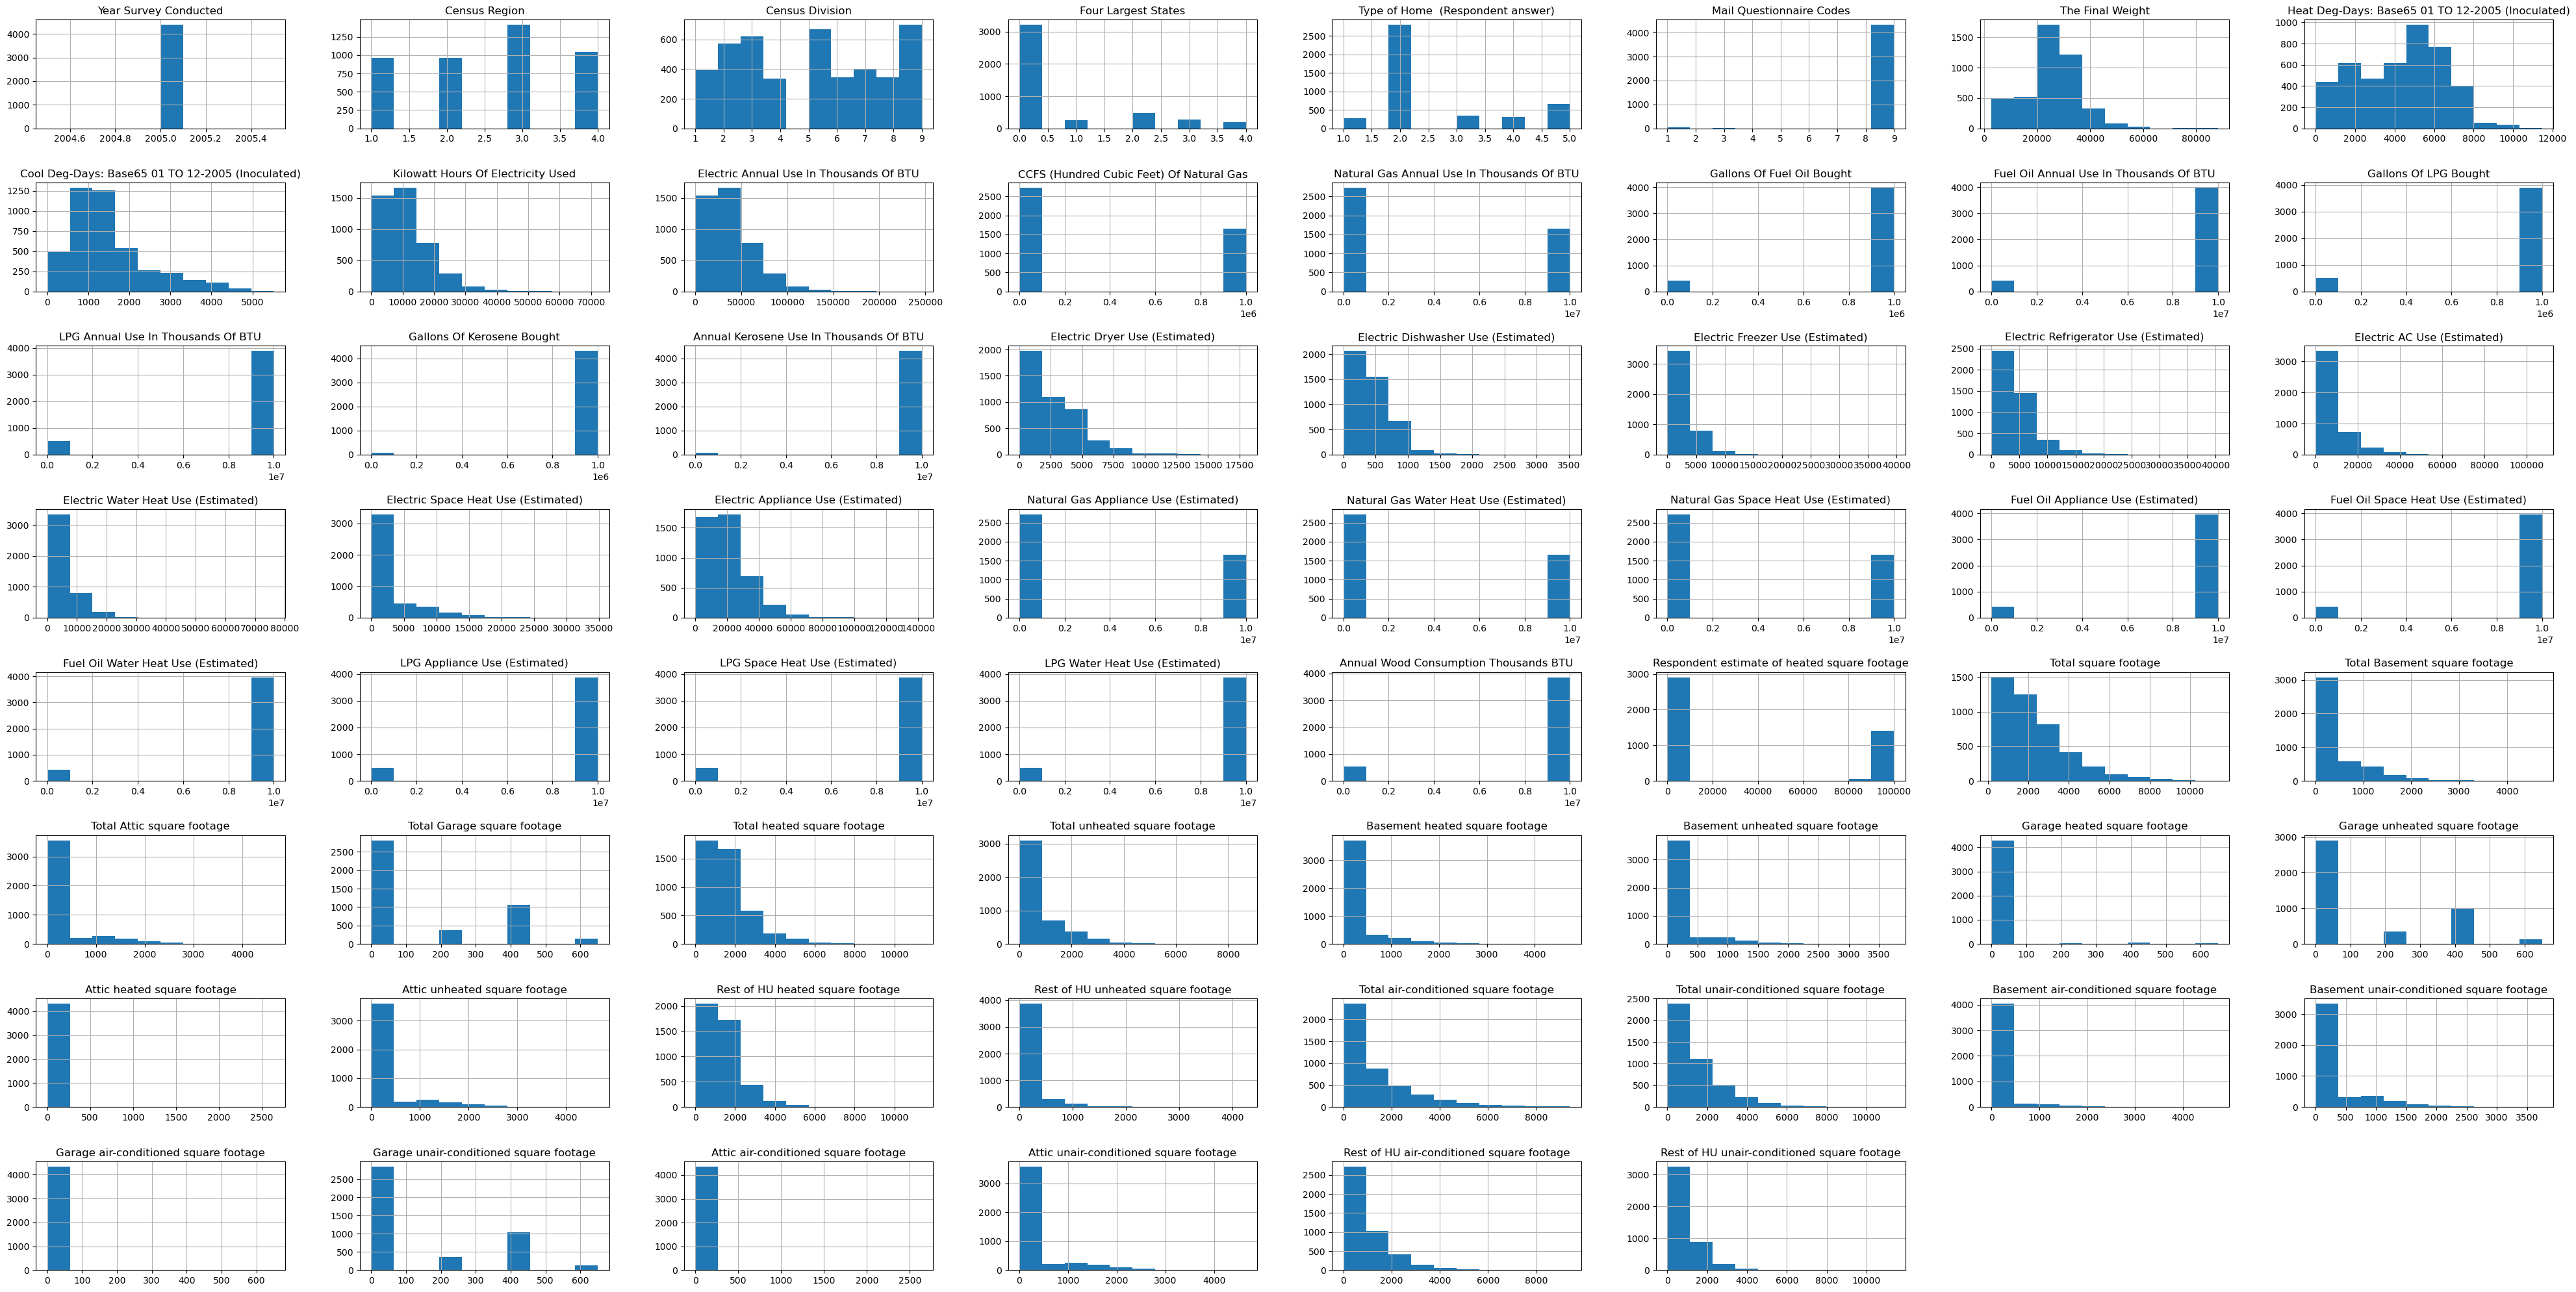

In [177]:
df.hist(figsize = (50, 25))
plt.subplots_adjust(hspace=0.5);

What features have possible cause for concern and why? 
* Mail Question Codes (most of the values are within the 9th category and few are in the 1st and 2nd category).
* Natural Gas/Fuel/Oil/Kerosene/LPG purchased/used graphs have a wide distributation.
* Square footage (small number of extreme values)
* Appliance usage (freezer, refrigerator, water heater) (small number of extreme values)

In order to check the square footage values, the individual parts were added together and compared to the totals. Note, the sum of the individual components differed from the total value by +/1, indicating a rounding issue within the original dataset. The difference was determine to be insignificant compared to the square foot values. 

**Attic**

In [181]:
print(df.columns[df.columns.str.contains("Attic")])

Index(['Total Attic square footage', 'Attic heated square footage',
       'Attic unheated square footage', 'Attic air-conditioned square footage',
       'Attic unair-conditioned square footage'],
      dtype='object')


In [182]:
Attic_diff = df['Total Attic square footage'] - (df['Attic heated square footage'] + df['Attic unheated square footage'])
print(df[Attic_diff.abs()>1][['Total Attic square footage','Attic heated square footage', 'Attic unheated square footage']])

Empty DataFrame
Columns: [Total Attic square footage, Attic heated square footage, Attic unheated square footage]
Index: []


In [183]:
Attic_diff = df['Total Attic square footage'] - (df['Attic air-conditioned square footage'] + df['Attic unair-conditioned square footage'])
df[Attic_diff.abs()>1].empty

True

**Basement**

In [185]:
print(df.columns[df.columns.str.contains("Basement")])

Index(['Total Basement square footage', 'Basement heated square footage',
       'Basement unheated square footage',
       'Basement air-conditioned square footage',
       'Basement unair-conditioned square footage'],
      dtype='object')


In [186]:
Basement_diff = df['Total Basement square footage'] - (df['Basement heated square footage'] + df['Basement unheated square footage'])
df[Basement_diff.abs()>1].empty

True

In [187]:
Basement_diff = df['Total Basement square footage'] - (df['Basement air-conditioned square footage'] + df['Basement unair-conditioned square footage'])
df[Basement_diff.abs()>1].empty

True

**Garage**

In [189]:
print(df.columns[df.columns.str.contains("Garage")])

Index(['Total Garage square footage', 'Garage heated square footage',
       'Garage unheated square footage',
       'Garage air-conditioned square footage',
       'Garage unair-conditioned square footage'],
      dtype='object')


In [190]:
Garage_diff = df['Total Garage square footage'] - (df['Garage heated square footage'] + df['Garage unheated square footage'])
df[Garage_diff.abs()>1].empty

True

In [191]:
Garage_diff = df['Total Garage square footage'] - (df['Garage air-conditioned square footage'] + df['Garage unair-conditioned square footage'])
df[Garage_diff.abs()>1].empty

True

**Heated**

In [193]:
print(df.columns[df.columns.str.contains("heated")])

Index(['Respondent estimate of heated square footage',
       'Total heated square footage', 'Total unheated square footage',
       'Basement heated square footage', 'Basement unheated square footage',
       'Garage heated square footage', 'Garage unheated square footage',
       'Attic heated square footage', 'Attic unheated square footage',
       'Rest of HU heated square footage',
       'Rest of HU unheated square footage'],
      dtype='object')


In [194]:
Heated_diff = df['Total heated square footage'] - (df['Basement heated square footage'] + df['Garage heated square footage'] + df['Attic heated square footage'] + df['Rest of HU heated square footage'])
df[Heated_diff.abs()>1].empty

True

In [195]:
unheated_diff = df['Total unheated square footage'] - (df['Basement unheated square footage'] + df['Garage unheated square footage'] + df['Attic unheated square footage'] + df['Rest of HU unheated square footage'])
df[unheated_diff.abs()>1].empty

True

**Air Conditioned**

In [197]:
print(df.columns[df.columns.str.contains("air-conditioned")])

Index(['Total air-conditioned square footage',
       'Total unair-conditioned square footage',
       'Basement air-conditioned square footage',
       'Basement unair-conditioned square footage',
       'Garage air-conditioned square footage',
       'Garage unair-conditioned square footage',
       'Attic air-conditioned square footage',
       'Attic unair-conditioned square footage',
       'Rest of HU air-conditioned square footage',
       'Rest of HU unair-conditioned square footage'],
      dtype='object')


In [198]:
ac_diff = df['Total air-conditioned square footage'] - (df['Basement air-conditioned square footage'] + df['Garage air-conditioned square footage'] + df['Attic air-conditioned square footage'] + df['Rest of HU air-conditioned square footage'])
df[ac_diff.abs()>1][['Total air-conditioned square footage', 'Basement air-conditioned square footage', 'Garage air-conditioned square footage','Attic air-conditioned square footage','Rest of HU air-conditioned square footage']]

,Total air-conditioned square footage,Basement air-conditioned square footage,Garage air-conditioned square footage,Attic air-conditioned square footage,Rest of HU air-conditioned square footage
4-digit identification number,,,,,
2,1320,0,0,0,660
3,2675,0,0,0,1886
5,1776,0,0,0,1332
6,891,0,0,0,0
8,299,0,0,0,0
...,...,...,...,...,...
4371,730,0,0,0,0
4372,5233,0,0,0,4117
4375,981,0,0,0,0


In [199]:
diff = df['Total square footage'] - df['Total air-conditioned square footage']
df[diff<0].empty

True

2,108 households report a total air-conditioned square footage larger than the sum of its components. The data was collected through homeowner surveys. It can be assumed the total air-conditioned square footage was not broken down in square footage of the attic, basement, garage, and/or the rest of the housing unit, or there is an additional area where squarefootage was not collected. Therefore, it is assumed that several of these features are missing from the dataset. We do not know how usefulness of the missing data. Therefore, these rows will not be removed from the dataset.

It should be noted, the total air-conditioned footage for these homes is less than or equal to the total square footage of the home. 

In [201]:
ac_diff = df['Total unair-conditioned square footage'] - (df['Basement unair-conditioned square footage'] + df['Garage unair-conditioned square footage'] + df['Attic unair-conditioned square footage'] + df['Rest of HU unair-conditioned square footage'])
df[ac_diff.abs()>1].empty

True

**Electric Appliances**

The freezer, refrigerator and water heater usages appear to have outliers based on the visual analysis. 

In [204]:
freezer_max = df['Electric Freezer Use (Estimated)'].max()
refrigerator_max = df['Electric Refrigerator Use (Estimated)'].max()
waterheater_max = df['Electric Water Heat Use (Estimated)'].max()

In [205]:
print("Max Freezer Usage:  ", freezer_max)
print("Max Refrigerator Usage:  ", refrigerator_max)
print("Max Water Heater Usage:  ", waterheater_max)

Max Freezer Usage:   39536
Max Refrigerator Usage:   40448
Max Water Heater Usage:   76335


In [206]:
freezer_hi = df['Electric Freezer Use (Estimated)'].quantile(0.999)
refrigerator_hi = df['Electric Refrigerator Use (Estimated)'].quantile(0.999)
waterheater_hi = df['Electric Water Heat Use (Estimated)'].quantile(0.999)

In [208]:
print("Last 0.1% of Data Freezer Usage:  ", freezer_hi)
print("Last 0.1% of Data Refrigerator Usage:  ", refrigerator_hi)
print("Last 0.1% of Data Water Heater Usage:  ", waterheater_hi)

Last 0.1% of Data Freezer Usage:   21129.58900000038
Last 0.1% of Data Refrigerator Usage:   29101.73600000092
Last 0.1% of Data Water Heater Usage:   45580.07900000617


The maximum values are significantly higher than 99.9% of the data. Therefor, values outside the 99.9% were removed. 

In [260]:
df = df[df['Electric Freezer Use (Estimated)'] <= freezer_hi]
df = df[df['Electric Refrigerator Use (Estimated)'] <= refrigerator_hi]
df = df[df['Electric Water Heat Use (Estimated)'] <= waterheater_hi]

print(df.shape)

(4370, 62)


In [231]:
#df.loc[df['Electric Freezer Use (Estimated)'] > freezer_hi, 'Electric Freezer Use (Estimated)'] = np.nan
#df.loc[df['Electric Refrigerator Use (Estimated)'] > refrigerator_hi, 'Electric Refrigerator Use (Estimated)'] = np.nan
#df.loc[df['Electric Water Heat Use (Estimated)'] > refrigerator_hi, 'Electric Water Heat Use (Estimated)'] = np.nan

In [262]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head(10)

,count,%
Year Survey Conducted,0,0.0
Garage heated square footage,0,0.0
LPG Appliance Use (Estimated),0,0.0
LPG Space Heat Use (Estimated),0,0.0
LPG Water Heat Use (Estimated),0,0.0
Annual Wood Consumption Thousands BTU,0,0.0
Respondent estimate of heated square footage,0,0.0
Total square footage,0,0.0
Total Basement square footage,0,0.0
Total Attic square footage,0,0.0


In [264]:
df.shape

(4370, 62)

## 1.7 Summary 

The purpose of this project is to develop a predictive model which estimates household energy usage based on factors such as household occupancy, location, and structural features. This step focuses on collecting data, organizing it, and making sure it's well defined. This project is focused on the household energy consumption of space heating and air conditioning, and the estimated usage of large appliances.

The original dataframe consisted of two merged tables (energy_usage_data and housing_footage_data), consisting of 4382 rows, and 32 and 122 columns, respectively. The data related to house hold energy consumption, appliance useage, cooling/heating, and square footage was extracted from the datasets. Duplicate columns were checked for repeating data, and removed from the dataframe. 

One data point is missing for columns pertaining to natural gas usage. These missing values were replaced by the median value of the given column. 

The distribution of values was examined to identify outliers within the dataset. The visual anlaysis identified several columns with wide distributions (Mail Question Codes, and Natural Gas/Fuel/Oil/Kerosene/LPG purchased). Additionally, the square footage and appliance usage graphs showed a small number of extreme values. 

The square footage was checked by comparing the total square footage to the square footage of home components. 2,108 rows have confliting data regarding the air-conditioned square footage. This is approximately 48% of the households in the dataseThe data was collected through homeowner surveys. It can be assumed the total air-conditioned square footage was not broken down in square footage of the attic, basement, garage, and/or the rest of the housing unit, or there is an additional area where squarefootage was not collected. Therefore, it is assumed that several of these features are missing from the dataset. We do not know how usefulness of the missing data. Therefore, these rows will not be removed from the dataset. It should be noted, the total air-conditioned footage for these homes is less than or equal to the total square footage of the home.

The freezer, refrigerator and water heater usages have outlier values. The rows with outliers values were removed from the dataset. These values were removed due to potential for error throughout the row, and/or because the energy usage within these homes is not representative. 

The final dataframe consists of 4370 rows and 62 columns. 